In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import squareform
import scipy.cluster.hierarchy as sch #might be obsolete
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import confusion_matrix
from function_pontius import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
%matplotlib inline

C:\Users\chimp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
### Load Results ###
#Class 4 Industrial
dist_tca4 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA4_df.csv')
vals_tca4 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA4_values.csv')

dist_pland4 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND4_df.csv')
vals_pland4 =  pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND4_values.csv')

#Class 14  Potatoes
dist_tca14 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA14_df.csv')
vals_tca14 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/TCA14_values.csv')

dist_pland14 = pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND14_df.csv')
vals_pland14 =  pd.read_csv('C:/LUMOS/MCK/Output_DFs/PLAND14_values.csv')


#Class 22 Nature
dist_tca22 = pd.read_csv('E:/thesis_data/Output_DFs/Total Class Area[class 22]_df.csv')
vals_tca22 = pd.read_csv('E:/thesis_data/Output_DFs/Total Class Area[class 22]_values.csv')

dist_pland22 = pd.read_csv('E:/thesis_data/Output_DFs/PLAND[class 22]_df.csv')
vals_pland22 =  pd.read_csv('E:/thesis_data/Output_DFs/PLAND[class 22]_values.csv')

# OQD_22
qd22_df = pd.read_csv('E:/thesis_data/Output_DFs/quantitydifferencecategorical_22_df.csv')
np.fill_diagonal(qd22_df.values, 0)

"""Non categorical metrics"""
# Shannon
dist_shan = pd.read_csv('E:/thesis_data/Output_DFs/shannon_df.csv')
shan_vals = pd.read_csv('E:/thesis_data/Output_DFs/shannon_values.csv')
# Simpsons
dist_simp = pd.read_csv('E:/thesis_data/Output_DFs/simp_df.csv')
vals_simp = pd.read_csv('E:/thesis_data/Output_DFs/simp_values.csv')
# Kappa
kappa_df = pd.read_csv('E:/thesis_data/Output_DFs/kappa.csv', index_col= 'Unnamed: 0')
dist_kappa = 1 - kappa_df
# OA
oa_df = pd.read_csv('E:/thesis_data/Output_DFs/overallaccuracy_df.csv')
dist_oa = 1 - oa_df
# OAD
oad_df = pd.read_csv('E:/thesis_data/Output_DFs/overallallocationdifference_df.csv')
np.fill_diagonal(oad_df.values, 0)
# OD
od_df = pd.read_csv('E:/thesis_data/Output_DFs/overalldifference_df.csv')
np.fill_diagonal(od_df.values, 0)
# OQD
oqd_df = pd.read_csv('E:/thesis_data/Output_DFs/overallquantitydifference_df.csv')
np.fill_diagonal(oqd_df.values, 0)

In [5]:
"""Cluster with the found number of clusters"""
kappaclusters = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='complete').fit(dist_kappa)
shannonclusters = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(dist_shan)
simpsonclusters = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit(dist_simp)
oaclusters = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='complete').fit(dist_oa)
odclusters = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='complete').fit(od_df)
oadclusters = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete').fit(oad_df)
oqdclusters = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(oqd_df)
qd22clusters = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(qd22_df)
tcacluster4 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_tca4)
tcacluster14 = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit(dist_tca14)
tcacluster22 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_tca22)
plandcluster4 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_pland4)
plandcluster14 = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete').fit(dist_pland14)
plandcluster22 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_pland22)

labels_kappa = kappaclusters.labels_
labels_shan = shannonclusters.labels_
labels_simp = simpsonclusters.labels_
labels_oa = oaclusters.labels_
labels_od = odclusters.labels_
labels_oad = oadclusters.labels_
labels_oqd = oqdclusters.labels_
labels_qd22 = qd22clusters.labels_
labels_tca4 = tcacluster4.labels_
labels_tca14 = tcacluster14.labels_
labels_tca22 = tcacluster22.labels_
labels_pland4 = plandcluster4.labels_
labels_pland14 = plandcluster14.labels_
labels_pland22 = plandcluster22.labels_

In [29]:
map_list = []
for i in range(2000):
    name = 'Map' +" " +  str(i)
    map_list.append(name)
    
xlabels = []
for i in range(0, 2000, 200):
    name = 'Map' +" " +  str(i)
    xlabels.append(name)
xlabels.append('Map 1999')

ylabels = [0, 1, 2, 3, 4, 5, 6]

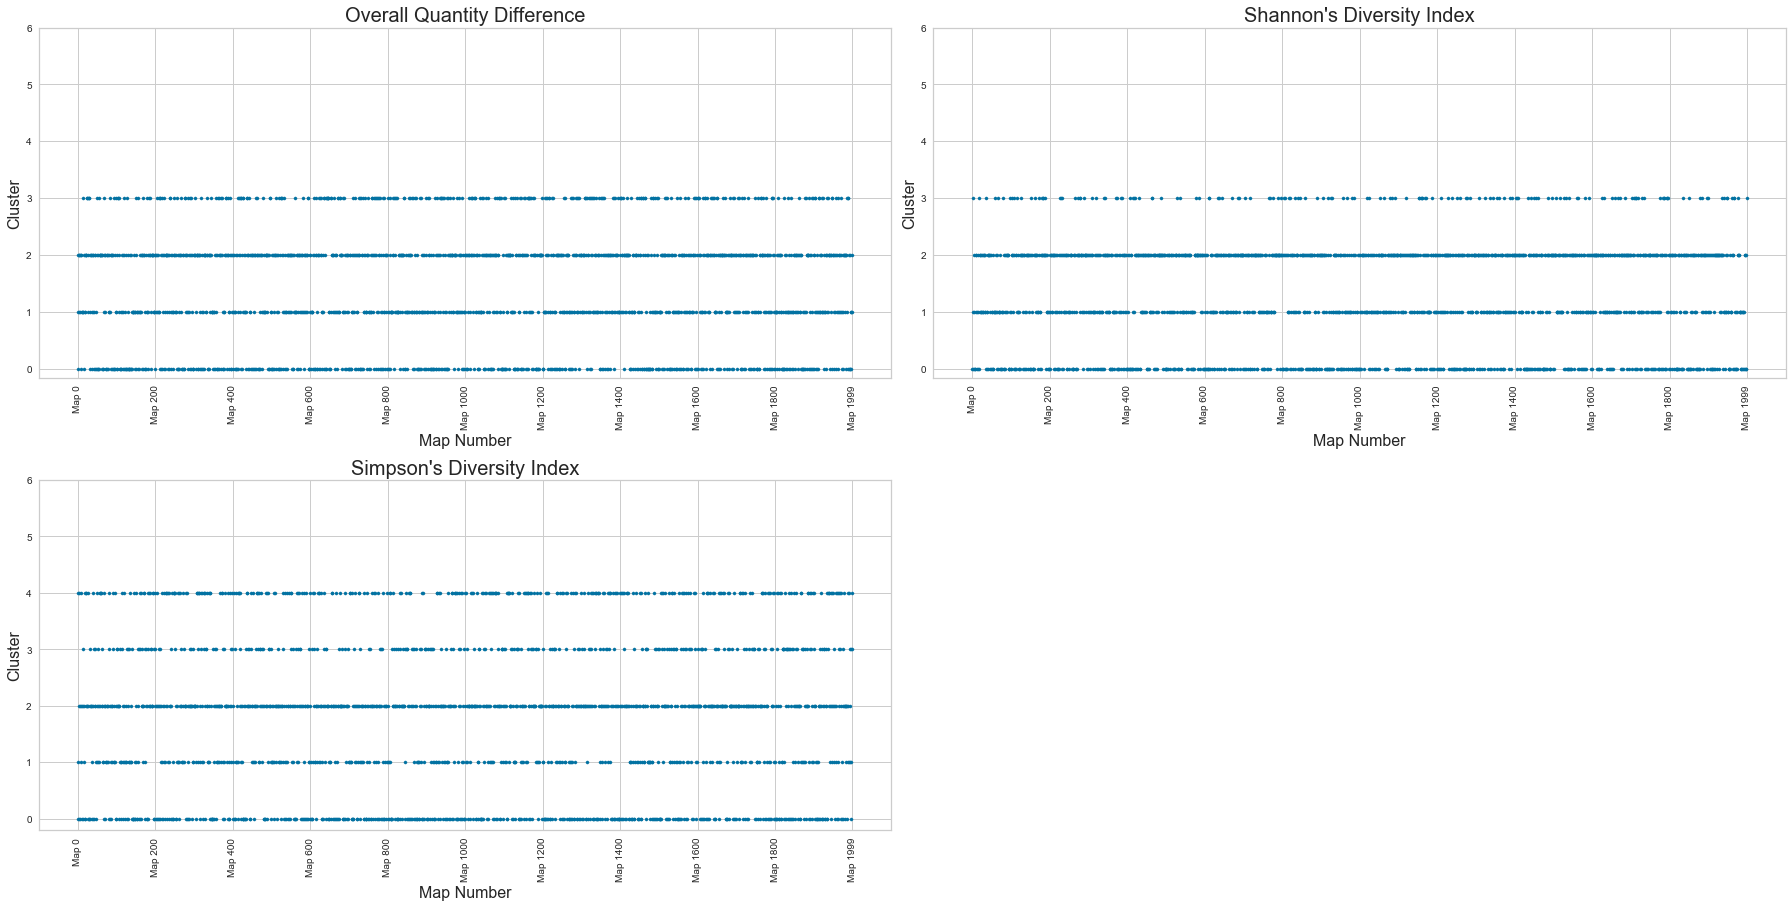

In [57]:
plt.figure(figsize=(25, 25)) 
dotsize = 10
# plt.subplot(4, 2, 1)
# plt.scatter(map_list, labels_kappa, s=dotsize)
# plt.yticks(ylabels, ylabels)
# plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
# plt.title('Kappa', fontsize=20)
# plt.xlabel('Map Number', fontsize=16)
# plt.ylabel('Cluster', fontsize=16)


# plt.subplot(4, 2, 2)
# plt.scatter(map_list, labels_oa, s=dotsize)
# plt.yticks(ylabels, ylabels)
# plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
# plt.title('Overall Accuracy', fontsize=20)
# plt.xlabel('Map Number', fontsize=16)
# plt.ylabel('Cluster', fontsize=16)

# plt.subplot(4, 2, 3)
# plt.scatter(map_list, labels_od, s=dotsize)
# plt.yticks(ylabels, ylabels)
# plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
# plt.title('Overall Difference', fontsize=20)
# plt.xlabel('Map Number', fontsize=16)
# plt.ylabel('Cluster', fontsize=16)

# plt.subplot(4, 2, 4)
# plt.scatter(map_list, labels_oad, s=dotsize)
# plt.yticks(ylabels, ylabels)
# plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
# plt.title('Overall Allocation Difference', fontsize=20)
# plt.xlabel('Map Number', fontsize=16)
# plt.ylabel('Cluster', fontsize=16)

plt.subplot(4, 2, 5)
plt.scatter(map_list, labels_oqd, s=dotsize)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
plt.title('Overall Quantity Difference', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)

plt.subplot(4, 2, 6)
plt.scatter(map_list, labels_shan, s=dotsize)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
plt.title('Shannon\'s Diversity Index', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)

plt.subplot(4, 2, 7)
plt.scatter(map_list, labels_simp, s=dotsize)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
plt.title('Simpson\'s Diversity Index', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)

plt.tight_layout()
plt.savefig('E:/thesis_images/clusterallocation_general2.png', format='png', bbox_inches='tight')
_ = plt.show()

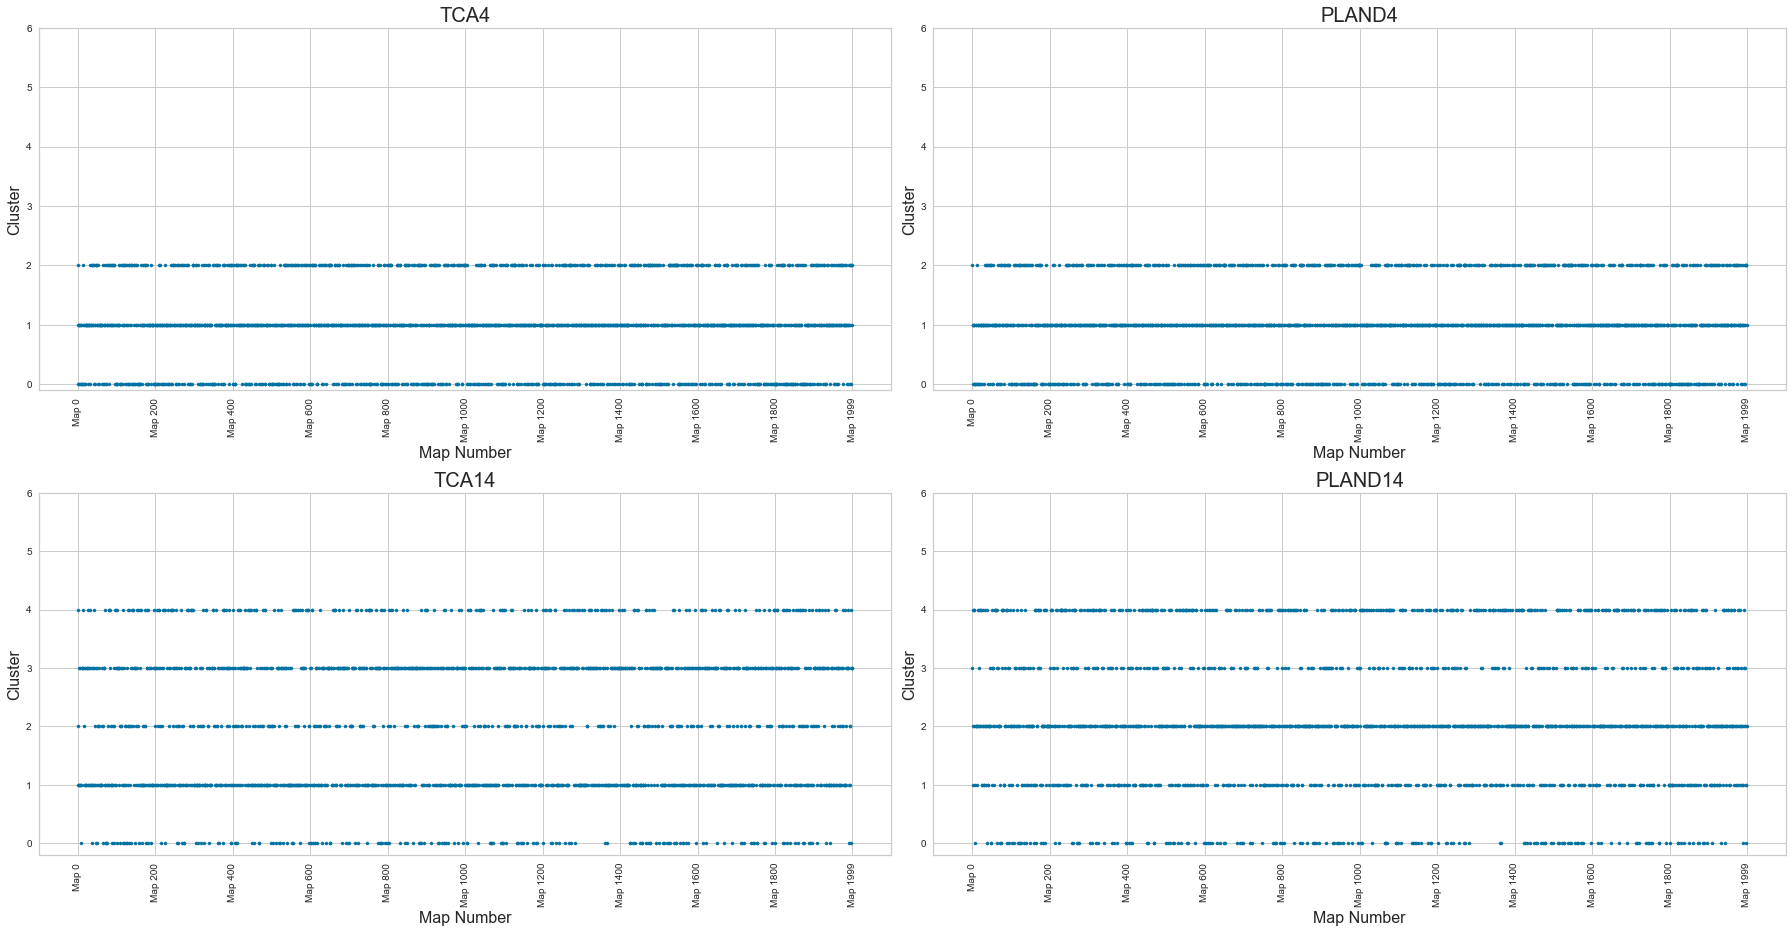

In [61]:
plt.figure(figsize=(25, 25)) 
dotsize=10
plt.subplot(4, 2, 1)
plt.scatter(map_list, labels_tca4, s=dotsize)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
plt.title('TCA4', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)


plt.subplot(4, 2, 2)
plt.scatter(map_list, labels_pland4, s=dotsize)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
plt.title('PLAND4', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)

plt.subplot(4, 2, 3)
plt.scatter(map_list, labels_tca14, s=dotsize)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
plt.title('TCA14', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)


plt.subplot(4, 2, 4)
plt.scatter(map_list, labels_pland14, s=dotsize)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
plt.title('PLAND14', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)

# plt.subplot(4, 2, 5)
# plt.scatter(map_list, labels_tca22, s=dotsize)
# plt.yticks(ylabels, ylabels)
# plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
# plt.title('TCA22', fontsize=20)
# plt.xlabel('Map Number', fontsize=16)
# plt.ylabel('Cluster', fontsize=16)


# plt.subplot(4, 2, 6)
# plt.scatter(map_list, labels_pland22, s=dotsize)
# plt.yticks(ylabels, ylabels)
# plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
# plt.title('PLAND22', fontsize=20)
# plt.xlabel('Map Number', fontsize=16)
# plt.ylabel('Cluster', fontsize=16)

# plt.subplot(4, 2, 7)
# plt.scatter(map_list, labels_qd22, s=dotsize)
# plt.yticks(ylabels, ylabels)
# plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999], xlabels, rotation='vertical')
# plt.title('Quantity Difference 22', fontsize=20)
# plt.xlabel('Map Number', fontsize=16)
# plt.ylabel('Cluster', fontsize=16)

plt.tight_layout()
plt.savefig('E:/thesis_images/clusterallocation_categorical.png', format='png')
_ = plt.show()
